# GooglePlay Project:

# Group 2


### Name of students:

יאיר עוגן

הוד גיספאן

דניאל חתוכה





<div>
<img src="https://github.com/Yairvedaniel/project1/blob/main/PHOTO-2024-06-05-14-34-50.jpg?raw=true" width="400"/>
</div>



<a id="top"></a>
# Table of Contents
1. [Introduction](#introduction)
2. [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)

    2.1.[Checking Values](#checking-Values)
3. [Paid Apps vs Free Apps](#paid-apps-vs-free-apps)


<a id="introduction"></a>
## 1.Introduction:

[back to top](#top)

### information on tha data
We'll work with a dataset, based on [Google Play Store](https://play.google.com/store/apps)

The source of the data file  [here](https://www.kaggle.com/datasets/bhavikjikadara/google-play-store-applications/data)

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px


In [218]:
url = 'https://raw.githubusercontent.com/hodsfiles/HrDataProject/main/googleplaystore.csv'
apps = pd.read_csv(url)
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [219]:
apps.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [220]:
apps.shape

(10841, 14)

In [221]:
apps.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

<a id="data-cleaning-and-preprocessing"></a>
## 2.Data Cleaning and Preprocessing:

[back to top](#top)


הסרת עמודה מיותרת

In [222]:
apps = apps.drop('Unnamed: 0', axis=1)
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<a id='checking-Values'></a>
#### 2.1 checking values
[back to top](#top)

In [223]:
apps.duplicated().sum()

483

In [224]:
#On play store, two apps may have same name, but all the size, installs, rating, reviews, price need not be same. so using these categories, we will drop the duplicates in the data
apps.drop_duplicates(['App','Size','Installs','Reviews','Rating','Price','Android Ver'], inplace=True)

In [225]:
apps.duplicated().sum()

0

In [226]:
apps.shape

(10350, 13)

In [227]:
missing_data = apps.isnull().sum()
print("Missing data before handling:")
print(missing_data)

Missing data before handling:
App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


הסרת שורות בעלי ערכים חסרים בודדים

In [228]:
apps = apps.dropna(subset=['Current Ver'])
apps = apps.dropna(subset=['Android Ver'])
apps = apps.dropna(subset=['Content Rating'])
apps = apps.dropna(subset=['Type'])

In [229]:
apps.shape

(10338, 13)

ישנו ערך קטגורי החוזר על עצמו במקרים רבים בעמודות מספריות. לאחר חשיבה בנוגע לנחיצותו בניתוח הנתונים - החלטנו להמיר אותו ב NaN

In [230]:
apps.replace('Varies with device', np.nan, inplace=True)

הסרת תווים מיוחדים מעמודות מספריות

In [231]:
# Columns to clean 
cols = ['Installs','Price']

# Characters to remove
chars = ['+',",","$"]

# storing columns_to_clean in col variable
for col in cols:
    # storing characters_to_clean in char variable
    for char in chars:
            apps[col] = apps[col].apply(lambda c: c.replace(char, ''))


In [232]:
def size_to_mb(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1000
    return None

apps.loc[:, 'Size_MB'] = apps['Size'].apply(size_to_mb)

# Display the first few rows to verify the changes
print(apps[['Size', 'Size_MB']].head())


   Size  Size_MB
0   19M     19.0
1   14M     14.0
2  8.7M      8.7
3   25M     25.0
4  2.8M      2.8


In [233]:
apps['Price'].unique()

array(['0', '4.99 ', '3.99 ', '6.99 ', '1.49 ', '2.99 ', '7.99 ', '5.99 ',
       '3.49 ', '1.99 ', '9.99 ', '7.49 ', '0.99 ', '9.00 ', '5.49 ',
       '10.00 ', '24.99 ', '11.99 ', '79.99 ', '16.99 ', '14.99 ',
       '1.00 ', '29.99 ', '12.99 ', '2.49 ', '10.99 ', '1.50 ', '19.99 ',
       '15.99 ', '33.99 ', '74.99 ', '39.99 ', '3.95 ', '4.49 ', '1.70 ',
       '8.99 ', '2.00 ', '3.88 ', '25.99 ', '399.99 ', '17.99 ',
       '400.00 ', '3.02 ', '1.76 ', '4.84 ', '4.77 ', '1.61 ', '2.50 ',
       '1.59 ', '6.49 ', '1.29 ', '5.00 ', '13.99 ', '299.99 ', '379.99 ',
       '37.99 ', '18.99 ', '389.99 ', '19.90 ', '8.49 ', '1.75 ',
       '14.00 ', '4.85 ', '46.99 ', '109.99 ', '154.99 ', '3.08 ',
       '2.59 ', '4.80 ', '1.96 ', '19.40 ', '3.90 ', '4.59 ', '15.46 ',
       '3.04 ', '4.29 ', '2.60 ', '3.28 ', '4.60 ', '28.99 ', '2.95 ',
       '2.90 ', '1.97 ', '200.00 ', '89.99 ', '2.56 ', '30.99 ', '3.61 ',
       '394.99 ', '1.26 ', '1.20 ', '1.04 '], dtype=object)

In [234]:
apps = apps.drop('Size', axis=1)

In [235]:
missing_data = apps.isnull().sum()
print("Missing data before handling:", "\n")
print(missing_data)

Missing data before handling: 

App                  0
Category             0
Rating            1460
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1301
Android Ver       1220
Size_MB           1524
dtype: int64


In [236]:
apps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_MB           float64
dtype: object

In [237]:
apps.Reviews = pd.to_numeric(apps.Reviews, errors='coerce')
apps.Price = pd.to_numeric(apps.Price, errors='coerce')
apps.Rating = pd.to_numeric(apps.Rating, errors='coerce')
apps.Installs = pd.to_numeric(apps.Installs, errors='coerce') 
apps.Size_MB = pd.to_numeric(apps.Size_MB, errors='coerce') 
apps.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_MB           float64
dtype: object

In [238]:
missing_data = apps.isnull().sum()
print("Missing data before handling:")
print(missing_data)

Missing data before handling:
App                  0
Category             0
Rating            1460
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1301
Android Ver       1220
Size_MB           1524
dtype: int64


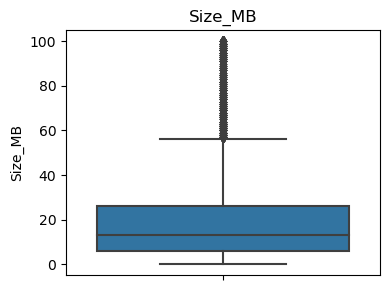

In [252]:
fig, axes = plt.subplots(figsize=(4,3))
plt.subplot()
sns.boxplot(data=apps, y='Size_MB')
plt.title('Size_MB')

plt.tight_layout()
plt.show()

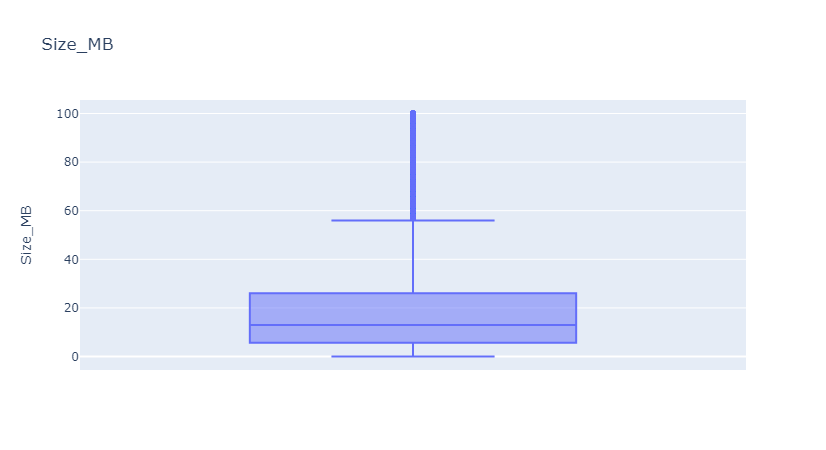

In [271]:
fig = px.box(apps, y='Size_MB', title='Size_MB', width=450, height=450)

# Show the plot
fig.show()

בדיקת חריגות בעמודות הרצויות

עמודת גודל האפליקציה = קיים פיזור רחב של הנתונים, ע''מ שהערכים החריגים לא ישפיעו על התפלגות הנתונים בצורה דומיננטית - נמלא את הערכים החסרים בחציון.
 חציון אינו מושפע מערכים קיצוניים, ולכן מספק ניתוח יציב יותר

In [240]:
median_size_mb = apps['Size_MB'].median()

# מילוי הערכים החסרים בעמודת Size_MB בחציון
apps['Size_MB'] = apps['Size_MB'].fillna(median_size_mb)

# הצגת התוצאה כדי לוודא שהערכים החסרים מולאו
print(apps['Size_MB'].isna().sum()) 

0


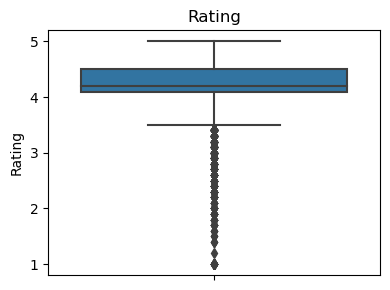

In [251]:
# Creating boxplots for each column and displaying them in the same row
fig, axes = plt.subplots(figsize=(4,3))
plt.subplot()
sns.boxplot(data=apps, y='Rating')
plt.title('Rating')

plt.tight_layout()
plt.show()

In [242]:
median_rate = apps['Rating'].mean()

# מילוי הערכים החסרים בעמודת Size_MB בחציון
apps['Rating'] = apps['Rating'].fillna(round(median_rate, 2))

# הצגת התוצאה כדי לוודא שהערכים החסרים מולאו
print(apps['Rating'].isna().sum())

0


In [243]:
missing_data = apps.isnull().sum()
print("Missing data after handling:")
print(missing_data)

Missing data after handling:
App                  0
Category             0
Rating               0
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1301
Android Ver       1220
Size_MB              0
dtype: int64


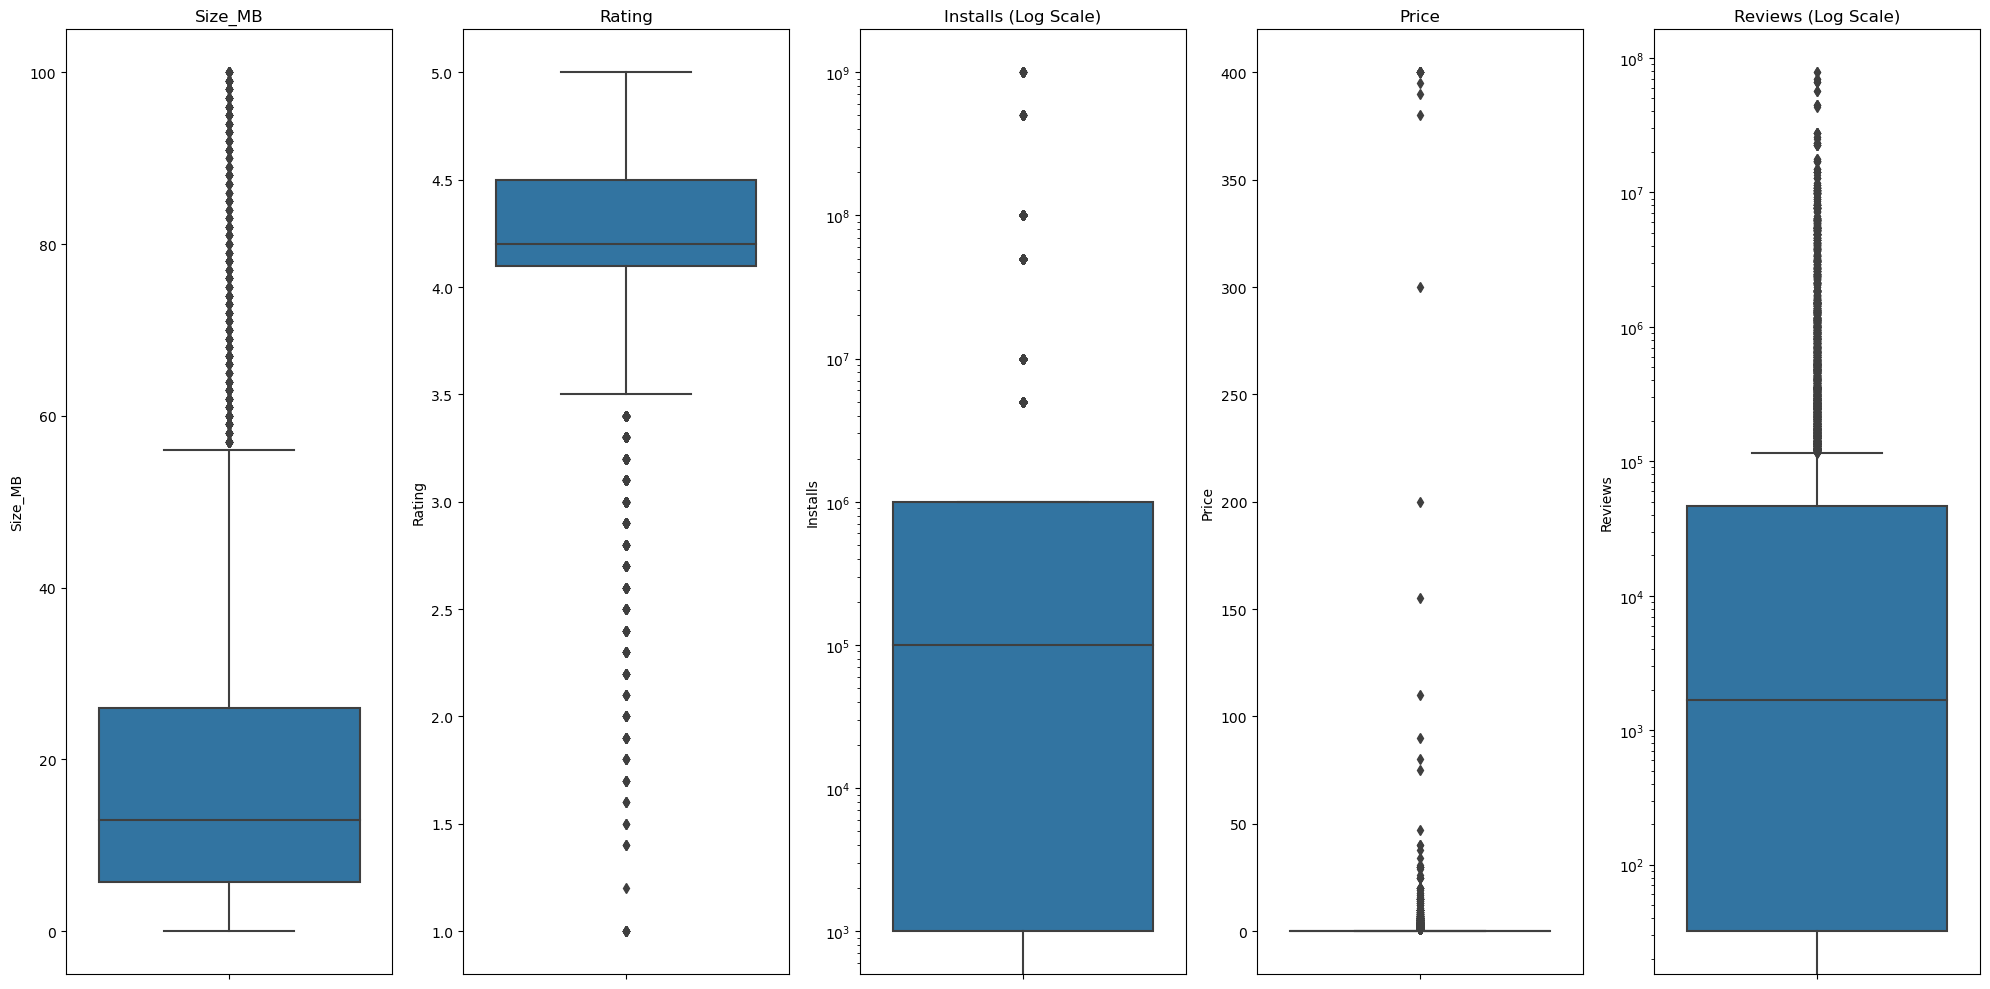

In [244]:
plt.figure(figsize=(20, 10))

# יצירת גרפי Box plot לכל עמודה והצגתן באותה השורה
plt.subplot(1, 5, 1)
sns.boxplot(data=apps, y='Size_MB')
plt.title('Size_MB')

plt.subplot(1, 5, 2)
sns.boxplot(data=apps, y='Rating')
plt.title('Rating')

plt.subplot(1, 5, 3)
sns.boxplot(data=apps, y='Installs')
plt.yscale('log')
plt.title('Installs (Log Scale)')

plt.subplot(1, 5, 4)
sns.boxplot(data=apps, y='Price')
plt.title('Price')

plt.subplot(1, 5, 5)
sns.boxplot(data=apps, y='Reviews')
plt.yscale('log')
plt.title('Reviews (Log Scale)')

plt.tight_layout()
plt.show()

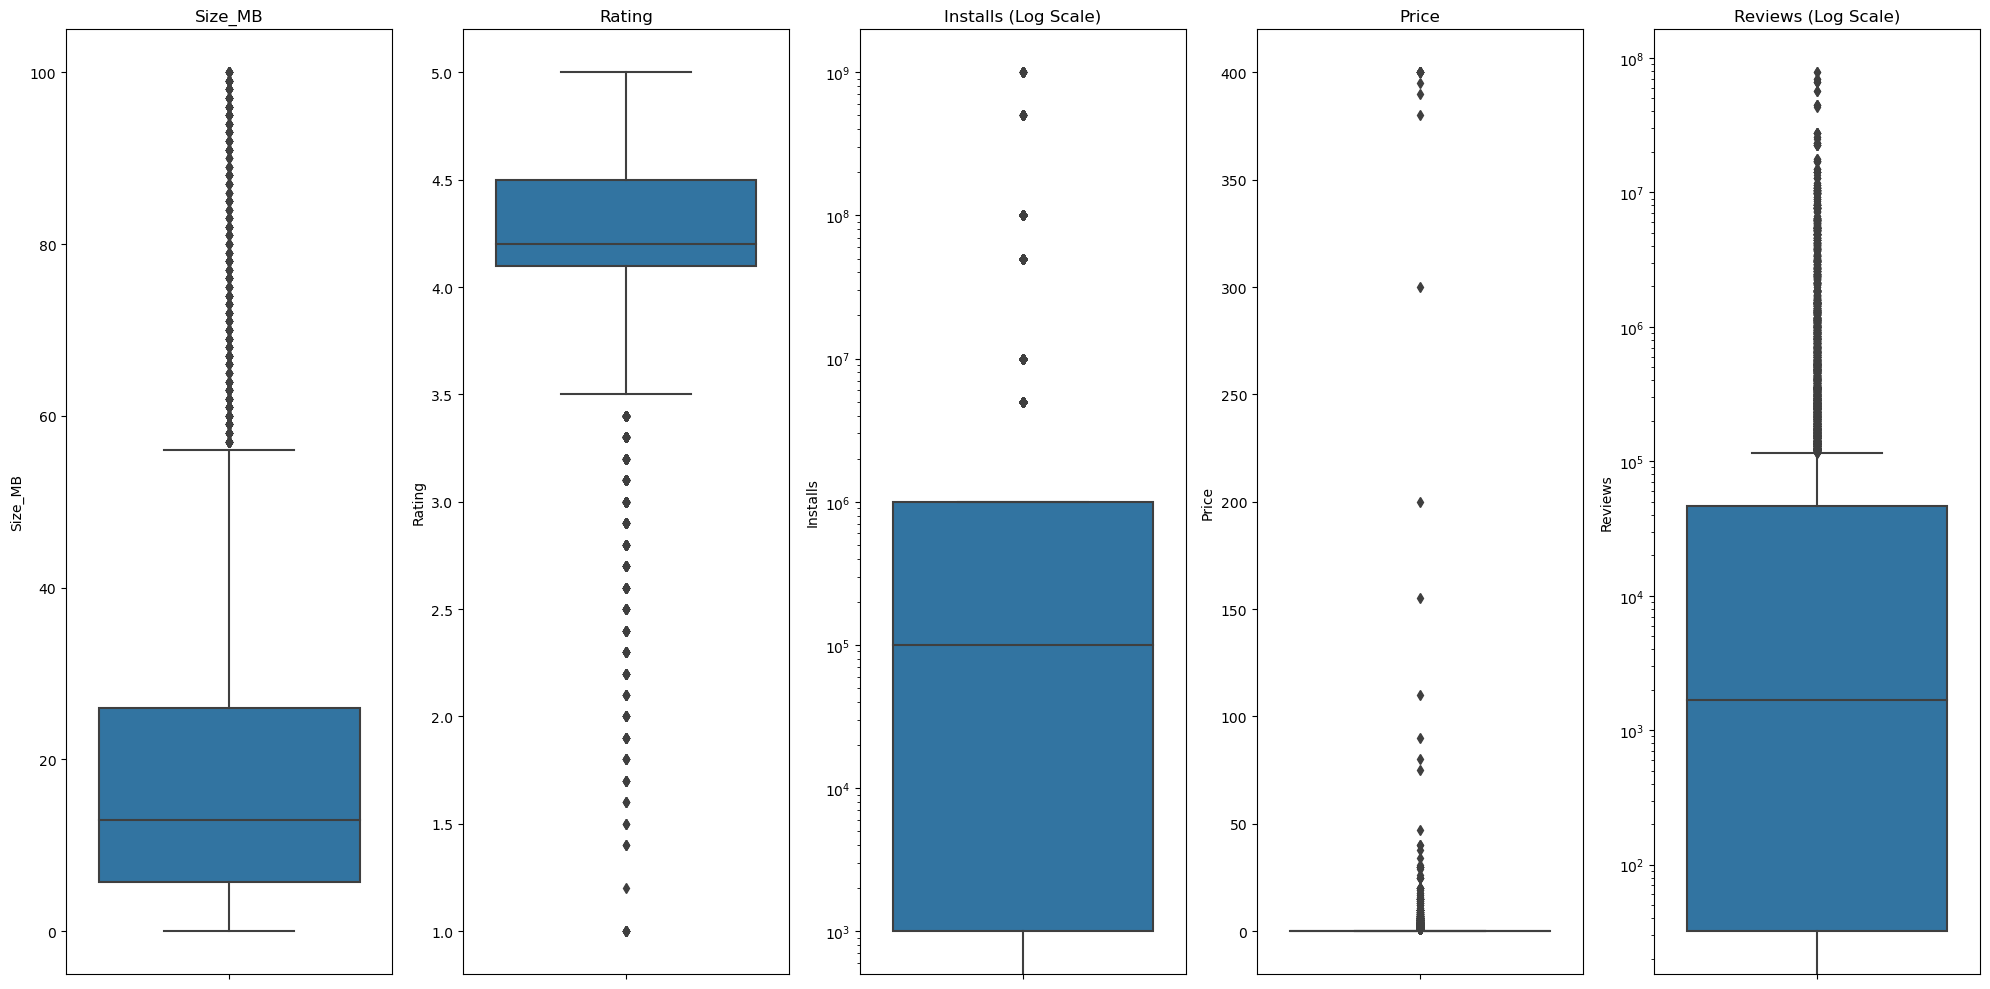

In [246]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

# גרף של Size_MB
sns.boxplot(data=apps, y='Size_MB', ax=axes[0])
axes[0].set_title('Size_MB')

# גרף של Rating
sns.boxplot(data=apps, y='Rating', ax=axes[1])
axes[1].set_title('Rating')

# גרף של Installs עם סקאלה לוגריתמית
sns.boxplot(data=apps, y='Installs', ax=axes[2])
axes[2].set_yscale('log')
axes[2].set_title('Installs (Log Scale)')

# גרף של Price
sns.boxplot(data=apps, y='Price', ax=axes[3])
axes[3].set_title('Price')

# גרף של Reviews עם סקאלה לוגריתמית
sns.boxplot(data=apps, y='Reviews', ax=axes[4])
axes[4].set_yscale('log')
axes[4].set_title('Reviews (Log Scale)')

plt.tight_layout()
plt.show()

<a id="paid-apps-vs-free-apps"></a>
## 3.Paid Apps vs Free Apps:

[back to top](#top)

מסקנה 1 - בדיקת הקשרים בין אפליקציות בתשלום\חינמיות אל מול שאר הנתונים

מסקנה 2 - 
מציאת הקשר בין דירוג האפליקציות לבין סיווג האפליקציות לפי סוגי האוכלוסיות השונות

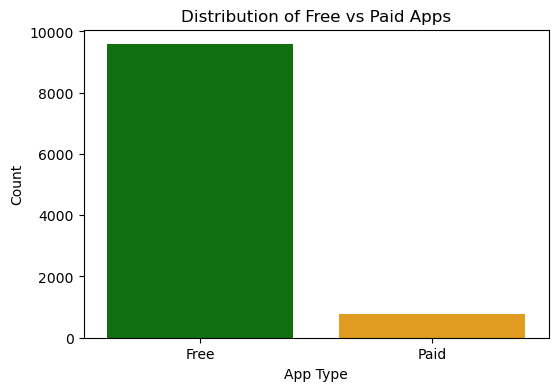

In [191]:
data_cleaned = apps.dropna(subset=['Type', 'Rating'])

# הגדרת צבעים מותאמים אישית
palette = {'Free': 'green', 'Paid': 'orange'}

# יצירת גרף עמודות המציג את התפלגות האפליקציות החינמיות מול האפליקציות בתשלום
plt.figure(figsize=(6, 4))
sns.countplot(x='Type', data=data_cleaned, palette=palette)
plt.title('Distribution of Free vs Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Count')
plt.show()

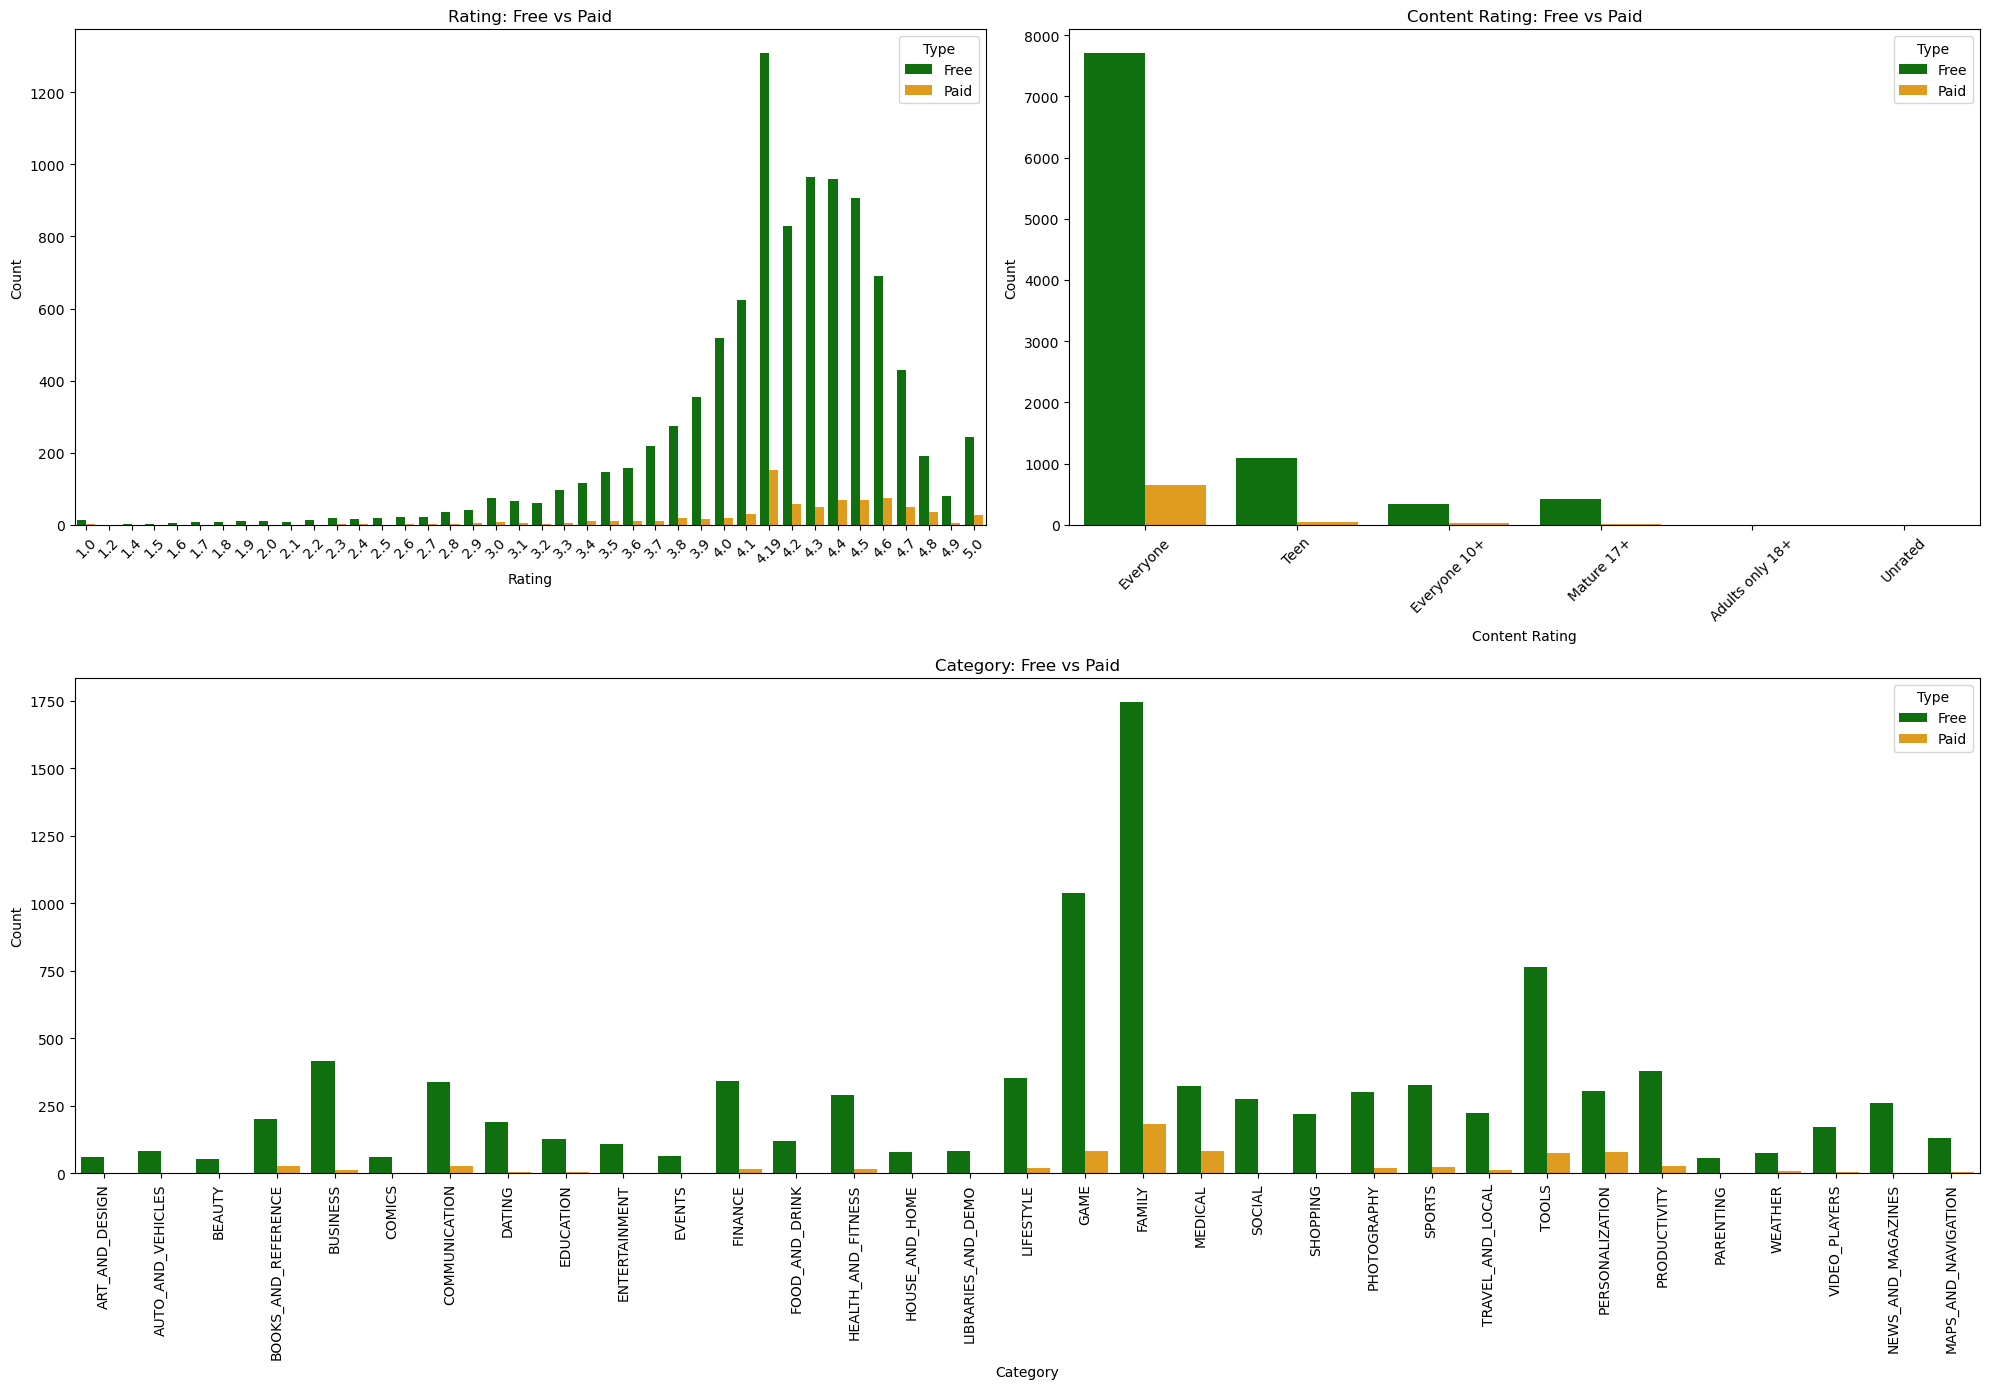

In [192]:
palette = {'Free': 'green', 'Paid': 'orange'}
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

sns.countplot(x='Rating', hue='Type', data=apps, palette=palette, ax=ax1).set(title='Rating: Free vs Paid', xlabel='Rating', ylabel='Count')
sns.countplot(x='Content Rating', hue='Type', data=apps, palette=palette, ax=ax2).set(title='Content Rating: Free vs Paid', xlabel='Content Rating', ylabel='Count')
sns.countplot(x='Category', hue='Type', data=apps, palette=palette, ax=ax3).set(title='Category: Free vs Paid', xlabel='Category', ylabel='Count')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

ניתן לראות את הקשר בין האפליקציות בחינם\בתשלום - לבין משתנים אחרים.

כגון הקטגוריות השונות, דירוג האפליקציה, סיווג האפליקציה על פי גילאים שונים. 

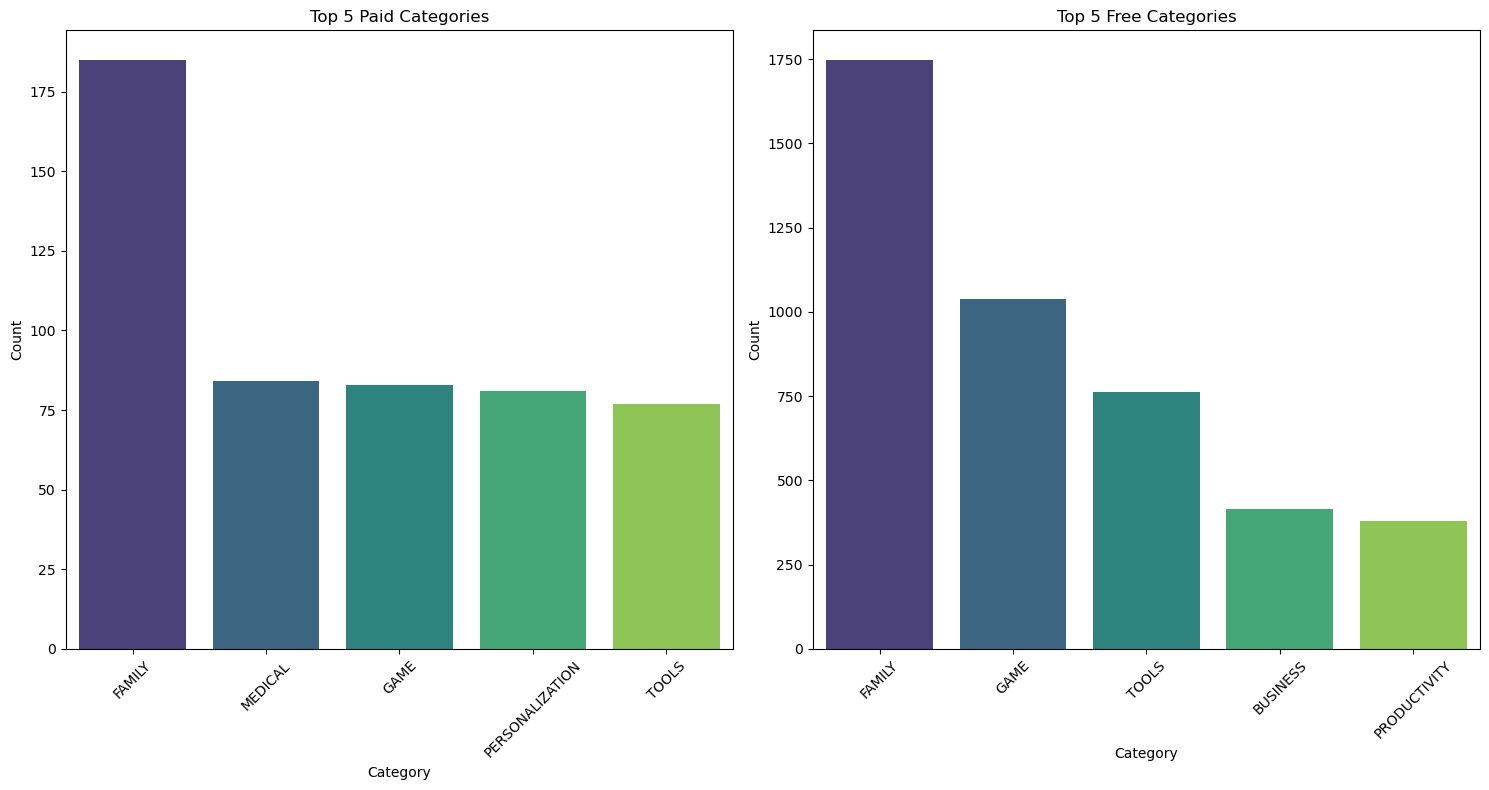

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

# סינון הנתונים עבור האפליקציות שבתשלום
paid_apps = apps[apps['Type'] == 'Paid']

# סינון הנתונים עבור האפליקציות שבחינם
free_apps = apps[apps['Type'] == 'Free']

# מציאת ה-5 קטגוריות התכופות ביותר שבתשלום
top_5_paid_categories = paid_apps['Category'].value_counts().head(5)

# מציאת ה-5 קטגוריות התכופות ביותר בחינם
top_5_free_categories = free_apps['Category'].value_counts().head(5)

# קביעת גודל התמונה
plt.figure(figsize=(15, 8))

# subplot עבור גרף הקטגוריות בתשלום
plt.subplot(1, 2, 1)
sns.countplot(data=paid_apps, x='Category', order=top_5_paid_categories.index, palette='viridis')
plt.title('Top 5 Paid Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# subplot עבור גרף הקטגוריות בחינם
plt.subplot(1, 2, 2)
sns.countplot(data=free_apps, x='Category', order=top_5_free_categories.index, palette='viridis')
plt.title('Top 5 Free Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# תצוגת הגרפים
plt.tight_layout()
plt.show()


In [194]:
# חישוב הדירוג הממוצע לאפליקציות בתשלום
average_rating_paid = data_cleaned[data_cleaned['Type'] == 'Paid']['Rating'].mean()

# חישוב הדירוג הממוצע לאפליקציות חינמיות
average_rating_free = data_cleaned[data_cleaned['Type'] == 'Free']['Rating'].mean()

print(f'The average rating of paid apps is: {round(average_rating_paid, 2)}')
print(f'The average rating of free apps is: {round(average_rating_free, 2)}')

The average rating of paid apps is: 4.25
The average rating of free apps is: 4.18


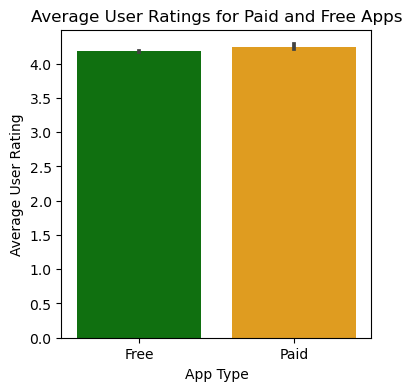

In [195]:
# Generate the graph comparing average user ratings for paid and free apps with specific colors
plt.figure(figsize=(4, 4))
sns.barplot(x='Type', y='Rating', data=apps, estimator=np.mean, palette={'Paid': 'orange', 'Free': 'green'})
plt.title('Average User Ratings for Paid and Free Apps')
plt.xlabel('App Type')
plt.ylabel('Average User Rating')
plt.show()


Average paid app rating =  4.246898817345598


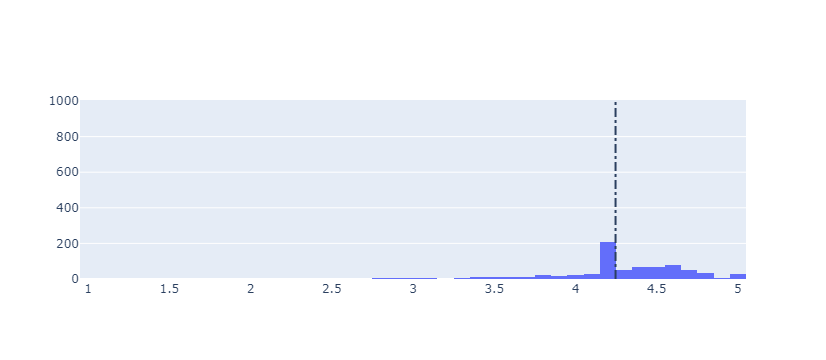

In [257]:
# Average rating of apps
paid_apps = apps[apps["Type"] == "Paid"]
free_apps = apps[apps["Type"] == "Free"]
avg_paid_app_rating = paid_apps["Rating"].mean()
avg_free_app_rating = free_apps["Rating"].mean()
print('Average paid app rating = ', avg_paid_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = paid_apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_paid_app_rating,
              'y0': 0,
              'x1': avg_paid_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average paid app rating =  4.183388326198184


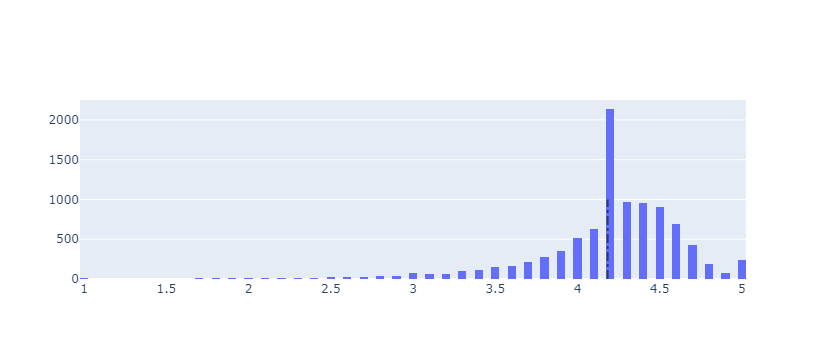

In [258]:
print('Average paid app rating = ', avg_free_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = free_apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_free_app_rating,
              'y0': 0,
              'x1': avg_free_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

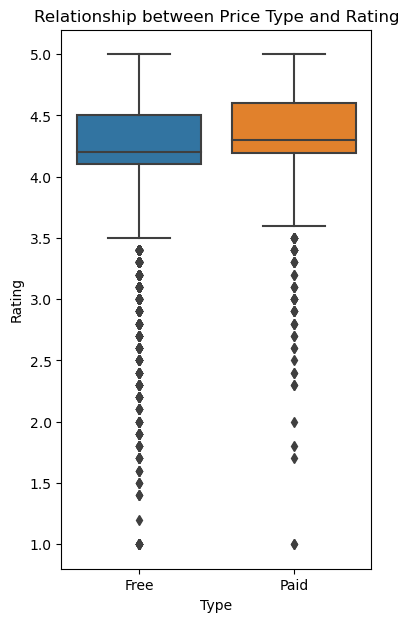

In [196]:
plt.figure(figsize=(4, 7))
sns.boxplot(x='Type', y='Rating', data=apps)
plt.title('Relationship between Price Type and Rating')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

ההבדל אמנם קטן, אך ניתן לראות כי בממוצע דירגו באופן נמוך יותר אפליקציות בתשלום.

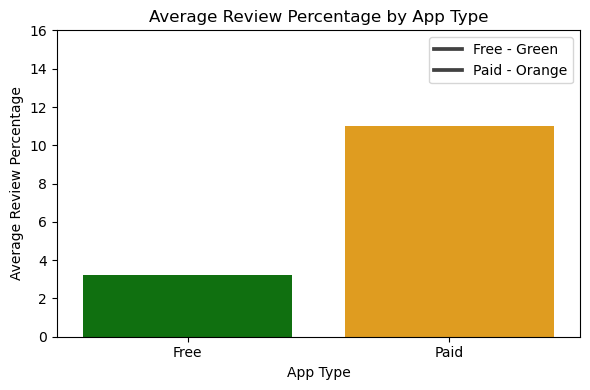

In [197]:
# חישוב אחוז הביקורות מסך כל ההתקנות לכל אפליקציה
apps['Review_Percentage'] = (apps['Reviews'] / apps['Installs']) * 100

# הסרת ערכים לא חוקיים בעמודת 'Review_Percentage'
apps = apps.dropna(subset=['Review_Percentage'])
apps = apps[apps['Review_Percentage'].apply(lambda x: isinstance(x, (int, float)))]


# יצירת גרף עמודות עם צבעים מותאמים ומקרא
plt.figure(figsize=(6, 4))
sns.barplot(data=average_review_percentage_df, x='Type', y='Average Review Percentage', palette=['green', 'orange'])
plt.title('Average Review Percentage by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Review Percentage')
plt.ylim(0, max(average_review_percentage_df['Average Review Percentage']) + 5)

# הוספת מקרא
plt.legend(['Free - Green', 'Paid - Orange'], loc='upper right')

plt.tight_layout()
plt.show()


### תובנה 1:

הנחת היסוד הייתה שמשתמשים שרכשו אפליקציות בתשלום יהיו ביקורתיים יותר ויטו לדרג אותן בציונים נמוכים יותר, מכיוון שהם משקיעים משאבים כספיים ולכן יצפו לחוויה משתמש משופרת. 

ניתוח הנתונים אכן הראה כי אחוז המשתמשים הפעילים בכתיבת ביקורות היה גבוה יותר עבור אפליקציות בתשלום, בהשוואה לאפליקציות חינמיות. 

לעומת זאת, בניגוד להנחה המקורית, התוצאות הצביעו על כך שהדירוג הממוצע של אפליקציות בתשלום היה גבוה יותר מזה של אפליקציות חינמיות.

לסיכום, קיימת פעילות ביקורתית רבה יותר מצד משתמשים באפליקציות בתשלום, ועם זאת, הם נוטים להעניק דירוגים גבוהים יותר לאפליקציות אלה. לכן, ניתן להסיק מכך שההשקעה הכספית באפליקציות בתשלום משתלמת, ורואים זאת גם על חווית המשתמש והמעורבות שלו.

### הקשר בין גודל האפליקציה לפופולריות שלה

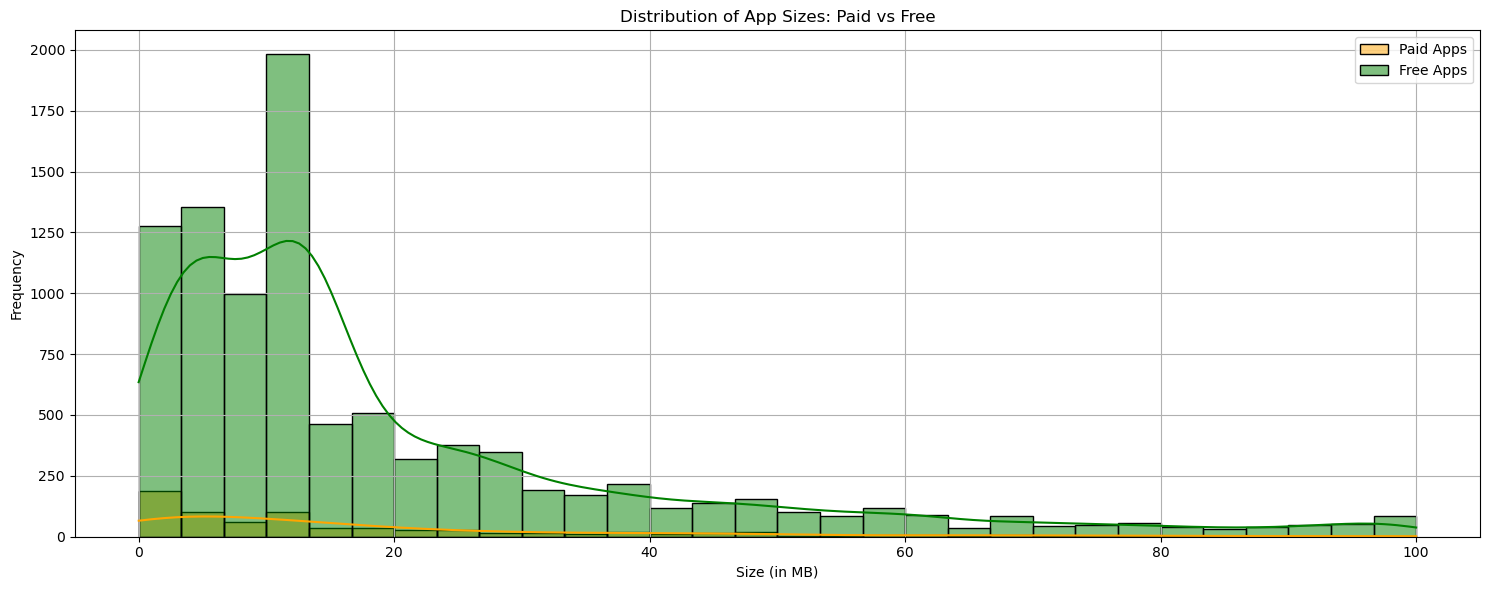

In [198]:

# סינון האפליקציות בתשלום
paid_apps = apps[apps['Type'] == 'Paid']

# הסרת ערכים חסרים בעמודות 'Rating' ו-'Size_MB'
paid_apps = paid_apps.dropna(subset=['Rating', 'Size_MB'])

# סינון האפליקציות החינמיות
free_apps = apps[apps['Type'] == 'Free']

# הסרת ערכים חסרים בעמודות 'Rating' ו-'Size_MB'
free_apps = free_apps.dropna(subset=['Rating', 'Size_MB'])

# התפלגות גדלי האפליקציות בתשלום בהשוואה לחינמיות
plt.figure(figsize=(15, 6))
sns.histplot(paid_apps['Size_MB'], color='orange', label='Paid Apps', kde=True, bins=30)
sns.histplot(free_apps['Size_MB'], color='green', label='Free Apps', kde=True, bins=30)
plt.title('Distribution of App Sizes: Paid vs Free')
plt.xlabel('Size (in MB)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [199]:
paid_apps = apps[apps['Type'] == 'Paid']

# הסרת ערכים חסרים בעמודות 'Size_MB'
paid_apps = paid_apps.dropna(subset=['Size_MB'])

# חישוב אחוז האפליקציות בתשלום שהן קטנות מ-20 MB (כולל) מכלל האפליקציות בתשלום
total_paid_apps = paid_apps.shape[0]
small_paid_apps = paid_apps[paid_apps['Size_MB'] <= 20].shape[0]

percentage_small_paid_apps = (small_paid_apps / total_paid_apps) * 100
percentage_small_paid_apps

69.6404793608522

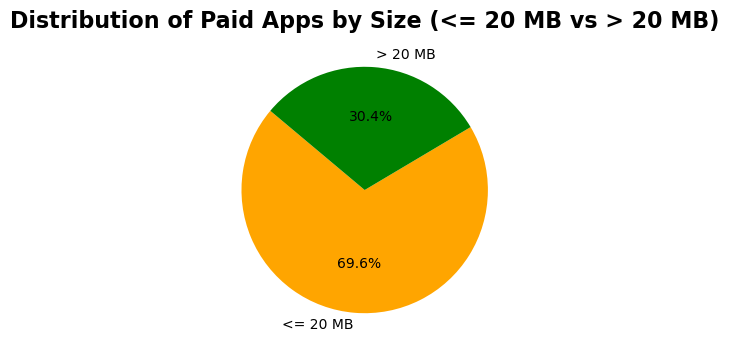

In [200]:
paid_apps = apps[apps['Type'] == 'Paid']

# הסרת ערכים חסרים בעמודות 'Size_MB'
paid_apps = paid_apps.dropna(subset=['Size_MB'])

# חישוב מספר האפליקציות בתשלום שהן קטנות מ-20 MB (כולל) וגדולות מ-20 MB
small_paid_apps = paid_apps[paid_apps['Size_MB'] <= 20].shape[0]
large_paid_apps = paid_apps[paid_apps['Size_MB'] > 20].shape[0]

# יצירת DataFrame להצגת הנתונים
size_distribution = pd.DataFrame({
    'Size Category': ['<= 20 MB', '> 20 MB'],
    'Number of Apps': [small_paid_apps, large_paid_apps]
})

# יצירת גרף עוגה להצגת אחוז האפליקציות הקטנות מ-20 MB (כולל) וגדולות מ-20 MB
plt.figure(figsize=(6, 4))
plt.pie(size_distribution['Number of Apps'], labels=size_distribution['Size Category'], autopct='%1.1f%%', colors=['orange', 'green'], startangle=140)
plt.title('Distribution of Paid Apps by Size (<= 20 MB vs > 20 MB)', fontsize=16, fontweight='bold')
plt.show()





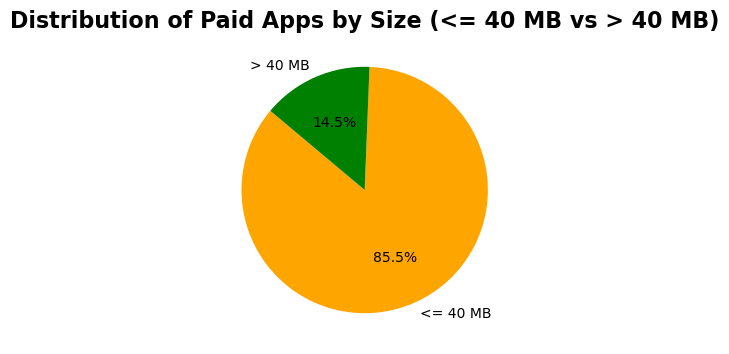

In [201]:

# סינון האפליקציות בתשלום
paid_apps = apps[apps['Type'] == 'Paid']

# הסרת ערכים חסרים בעמודות 'Size_MB'
paid_apps = paid_apps.dropna(subset=['Size_MB'])

# חישוב מספר האפליקציות בתשלום שהן קטנות מ-40 MB (כולל) וגדולות מ-40 MB
small_paid_apps = paid_apps[paid_apps['Size_MB'] <= 40].shape[0]
large_paid_apps = paid_apps[paid_apps['Size_MB'] > 40].shape[0]

# יצירת DataFrame להצגת הנתונים
size_distribution = pd.DataFrame({
    'Size Category': ['<= 40 MB', '> 40 MB'],
    'Number of Apps': [small_paid_apps, large_paid_apps]
})

# יצירת גרף עוגה להצגת אחוז האפליקציות הקטנות מ-40 MB (כולל) וגדולות מ-40 MB
plt.figure(figsize=(6, 4))
plt.pie(size_distribution['Number of Apps'], labels=size_distribution['Size Category'], autopct='%1.1f%%', colors=['orange', 'green'], startangle=140)
plt.title('Distribution of Paid Apps by Size (<= 40 MB vs > 40 MB)', fontsize=16, fontweight='bold')
plt.show()


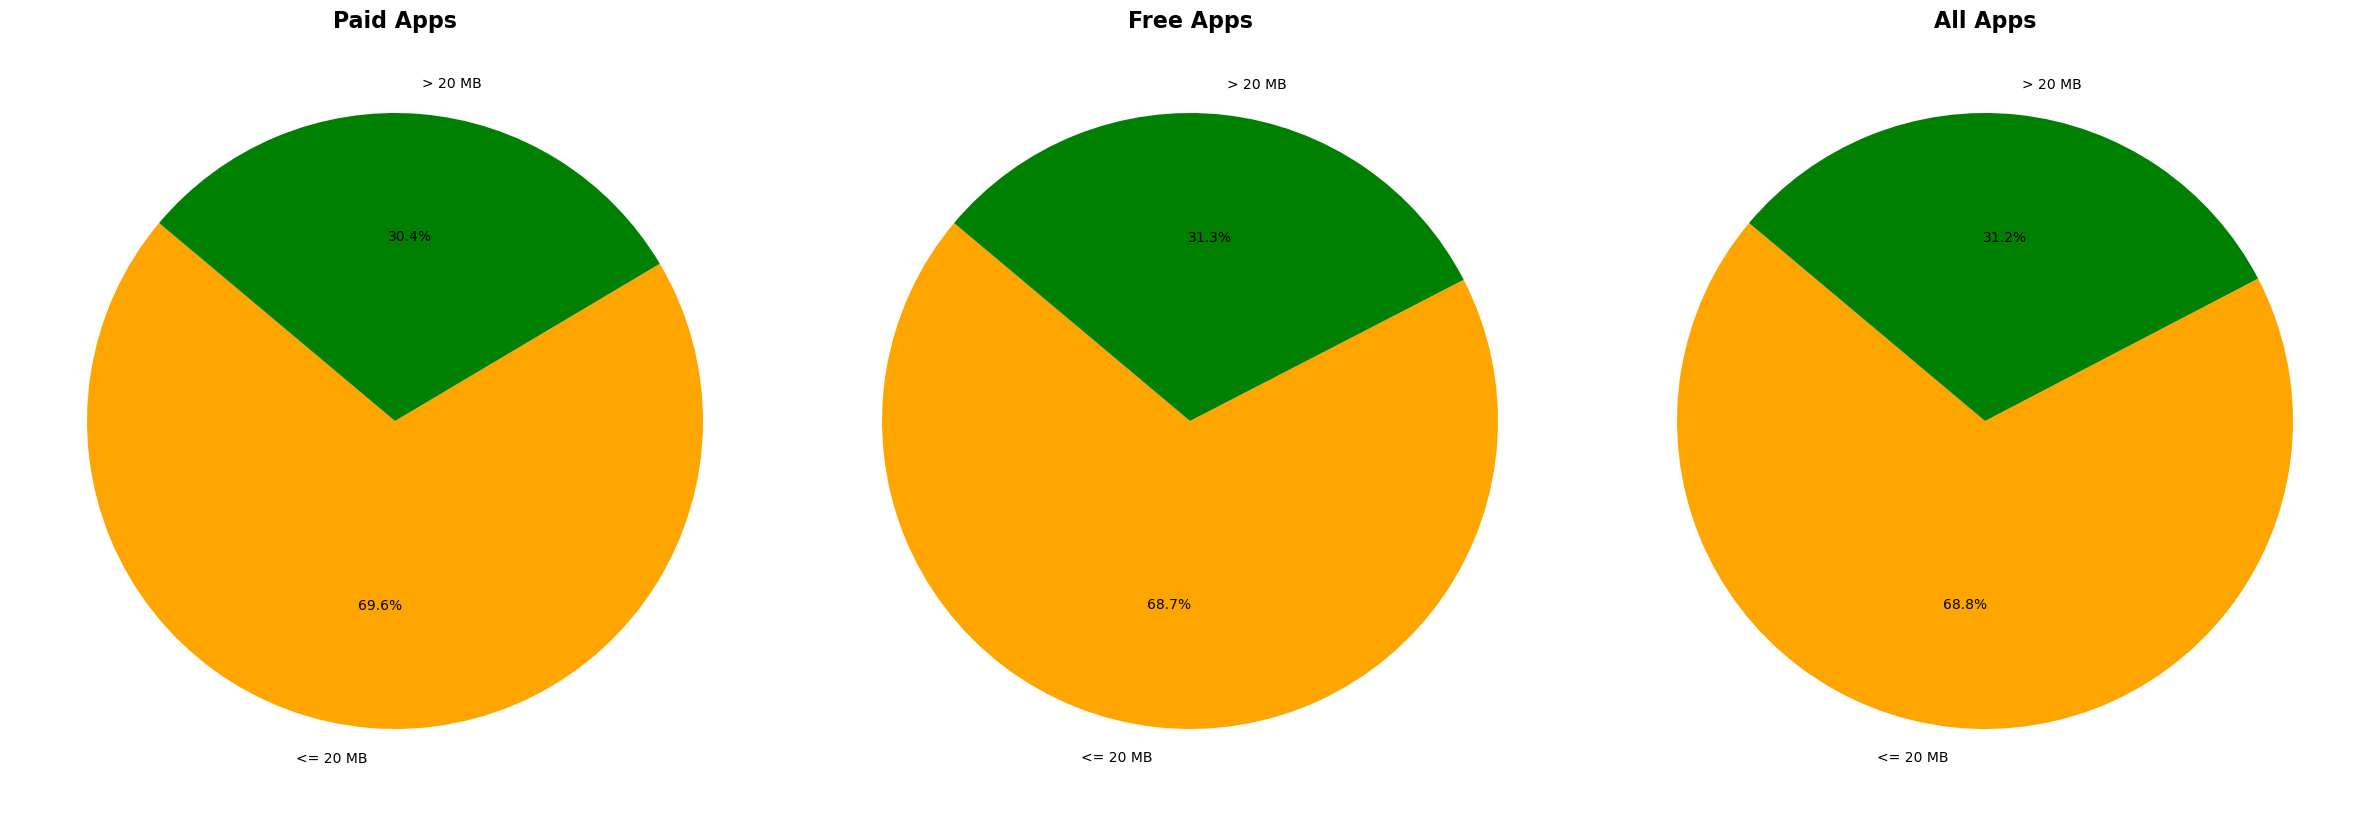

In [202]:
# סינון האפליקציות בתשלום ובחינם
paid_apps = apps[apps['Type'] == 'Paid']
free_apps = apps[apps['Type'] == 'Free']

# הסרת ערכים חסרים בעמודות 'Size_MB'
paid_apps = paid_apps.dropna(subset=['Size_MB'])
free_apps = free_apps.dropna(subset=['Size_MB'])

# חישוב מספר האפליקציות בתשלום ובחינם שהן קטנות מ-20 MB (כולל) וגדולות מ-20 MB
small_paid_apps = paid_apps[paid_apps['Size_MB'] <= 20].shape[0]
large_paid_apps = paid_apps[paid_apps['Size_MB'] > 20].shape[0]

small_free_apps = free_apps[free_apps['Size_MB'] <= 20].shape[0]
large_free_apps = free_apps[free_apps['Size_MB'] > 20].shape[0]

small_all_apps = apps[apps['Size_MB'] <= 20].shape[0]
large_all_apps = apps[apps['Size_MB'] > 20].shape[0]

# יצירת DataFrame להצגת הנתונים
size_distribution_paid = pd.DataFrame({
    'Size Category': ['<= 20 MB', '> 20 MB'],
    'Number of Apps': [small_paid_apps, large_paid_apps]
})

size_distribution_free = pd.DataFrame({
    'Size Category': ['<= 20 MB', '> 20 MB'],
    'Number of Apps': [small_free_apps, large_free_apps]
})

size_distribution_all = pd.DataFrame({
    'Size Category': ['<= 20 MB', '> 20 MB'],
    'Number of Apps': [small_all_apps, large_all_apps]
})

# יצירת גרפי עוגה להצגת אחוז האפליקציות הקטנות מ-20 MB (כולל) וגדולות מ-20 MB
plt.figure(figsize=(24, 8))

# גרף עוגה עבור אפליקציות בתשלום
plt.subplot(1, 3, 1)
plt.pie(size_distribution_paid['Number of Apps'], labels=size_distribution_paid['Size Category'], autopct='%1.1f%%', colors=['orange', 'green'], startangle=140)
plt.title('Paid Apps', fontsize=16, fontweight='bold')

# גרף עוגה עבור אפליקציות חינמיות
plt.subplot(1, 3, 2)
plt.pie(size_distribution_free['Number of Apps'], labels=size_distribution_free['Size Category'], autopct='%1.1f%%', colors=['orange', 'green'], startangle=140)
plt.title('Free Apps', fontsize=16, fontweight='bold')

# גרף עוגה עבור כל האפליקציות
plt.subplot(1, 3, 3)
plt.pie(size_distribution_all['Number of Apps'], labels=size_distribution_all['Size Category'], autopct='%1.1f%%', colors=['orange', 'green'], startangle=140)
plt.title('All Apps', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

ניתן לראות באופן ברור כי קרוב ל70% מסך האפליקציות הם בעלות גודל יחסית קטן.

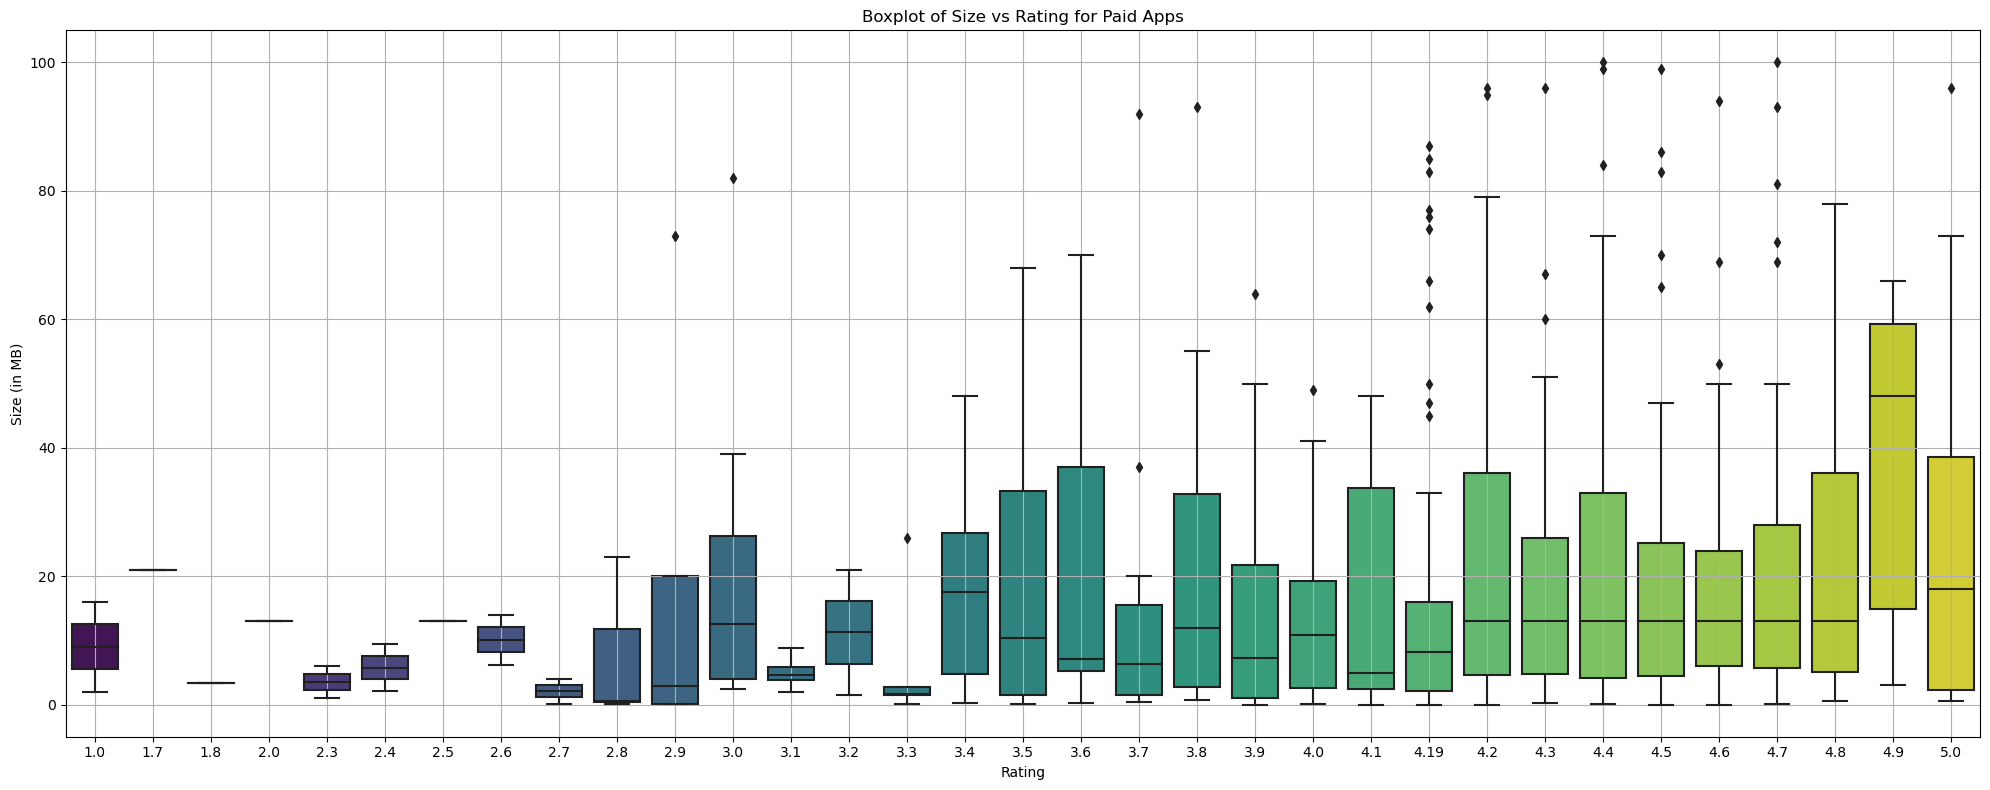

In [203]:

# סינון האפליקציות בתשלום
paid_apps = apps[apps['Type'] == 'Paid']

# הסרת ערכים חסרים בעמודות 'Rating' ו-'Size_MB'
paid_apps = paid_apps.dropna(subset=['Rating', 'Size_MB'])

# יצירת גרף בוקספלוט להשוואת גודל האפליקציה לדירוג עבור אפליקציות בתשלום
plt.figure(figsize=(20, 8))
sns.boxplot(data=paid_apps, x='Rating', y='Size_MB', palette='viridis')
plt.title('Boxplot of Size vs Rating for Paid Apps')
plt.xlabel('Rating')
plt.ylabel('Size (in MB)')
plt.grid(True)

plt.tight_layout()
plt.show()

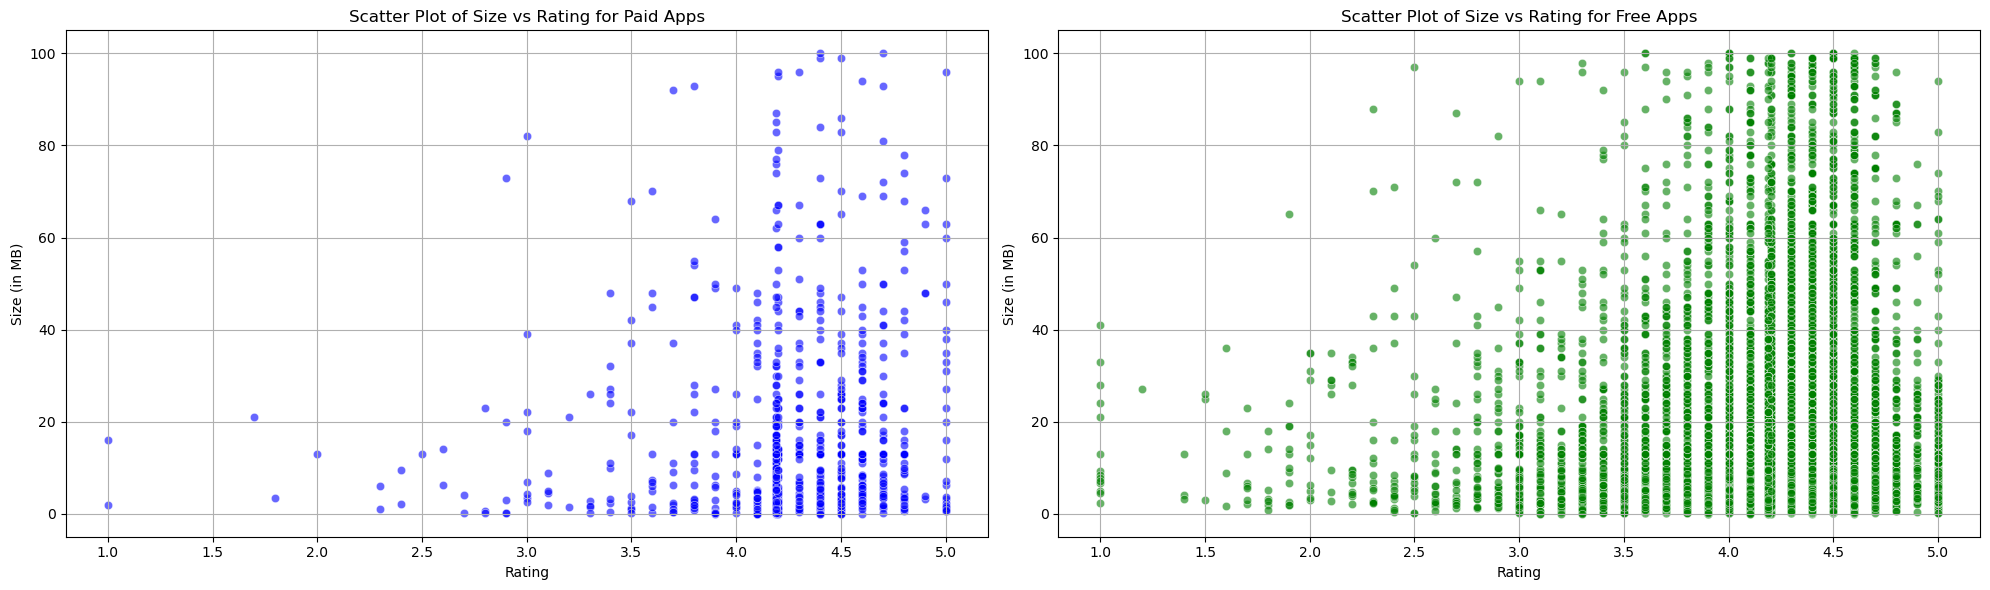

In [204]:

# סינון האפליקציות בתשלום
paid_apps = apps[apps['Type'] == 'Paid']

# הסרת ערכים חסרים בעמודות 'Rating' ו-'Size_MB'
paid_apps = paid_apps.dropna(subset=['Rating', 'Size_MB'])

# סינון האפליקציות החינמיות
free_apps = apps[apps['Type'] == 'Free']

# הסרת ערכים חסרים בעמודות 'Rating' ו-'Size_MB'
free_apps = free_apps.dropna(subset=['Rating', 'Size_MB'])

# יצירת גרף פיזור להשוואת גודל האפליקציה לדירוג עבור אפליקציות בתשלום וחינמיות
plt.figure(figsize=(20, 6))

# גרף פיזור עבור אפליקציות בתשלום
plt.subplot(1, 2, 1)
sns.scatterplot(data=paid_apps, x='Rating', y='Size_MB', color='blue', alpha=0.6)
plt.title('Scatter Plot of Size vs Rating for Paid Apps')
plt.xlabel('Rating')
plt.ylabel('Size (in MB)')
plt.grid(True)

# גרף פיזור עבור אפליקציות חינמיות
plt.subplot(1, 2, 2)
sns.scatterplot(data=free_apps, x='Rating', y='Size_MB', color='green', alpha=0.6)
plt.title('Scatter Plot of Size vs Rating for Free Apps')
plt.xlabel('Rating')
plt.ylabel('Size (in MB)')
plt.grid(True)

plt.tight_layout()
plt.show()


### תובנה 2:

הרוב המכריע של האפליקציות בתשלום שמדורגות גבוה הן בעלות גודל קטן. המשמעות היא שרוב האפליקציות בתשלום מתוכננות ומפותחות למלא פונקציות ספציפיות ולכן אינן כבדות. בנוסף, משתמשים **מעדיפים לשלם** על אפליקציות שהן **קלות משקל**. ע"פ דירוג המשתמשים ניתן לראות כי אפליקציה בתשלום שהיא כבדה עשויה שלא להצליח בשוק.